---
# <font color="SANDYBROWN">DATA PREPROCESSING</font>
---

**TABLE OF CONTENTS**
<br>

> **PHASE 1** <br> [**DATA CLEANING**](#-Phase-1--DATA-CLEANING-)
* [Missing / NaN / Null Values](#(1.1)-Missing-/-Null-/-NaN-Values)
* [Noise / Outlier Value](#(1.2)-Outliers-/-Noise-Values)

> **PHASE 2** <br> [**DATA INTEGRATION**](#-Phase-2--DATA-INTEGRATION-)
* [Merge Tables](#(2.1)-Data-Integration---Join-/-Merge-Tables)
* [Tuple Duplication](#(2.2)-Data-Integration---Tuple-Duplication)
* [Discrepancy Detection](#(2.3)-Data-Integration---Data-Value-Conflict-/-Discrepancy-Detection)
* [Redudancy Check for Nominal Data](#(2.4.1)-Data-Integration---Redudancy-Check:-Chi-Square-Test-for-Nominal/Categorical-Data) / [Numerical Data](#(2.4.2)-Data-Integration---Redudancy-Check:-Correlation-Coefficient-for-Numerical-Data)

> **PHASE 3** <br> [**DATA REDUCTION / SELECTION / COMPRESSION**](#-Phase-3--DATA-REDUCTION-/-SELECTION-/-COMPRESSION-)
* [Dimensionality Reduction]()
 * [Feature Selection]()
 * [Feature Extraction]()
 * [Feature Compression]()
* [Numerosity Reduction]()
 * [Parametric Method]()
 * [Non-Parametric Method]()

> **PHASE 4** <br> [**DATA TRANSFORMATION**](#-Phase-4--DATA-TRANSFORMATION-)
* [Standarization]()
* [Normalization]()
* [Discretization]()
* [Concept Hierarchy Generation]()

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn.preprocessing import StandardScaler as ss

In [2]:
np.set_printoptions(suppress=True) # remove e-scientific notation

### Create Dummy Dataset and Describe Its EDD

<font color="red">To be notice: <b>All dataset here are dummies so they DO NOT project the real data.</b></font>

In [2]:
myData = pd.DataFrame({ "Id" : ["BT04", "BG12", "SB11", "MD24", "MK09", "JK35", "PD22", "BD18", "KD06", "MN14"],
                        "Tourist_attraction" : ["Ngarai Sianok", "Taman Safari", "Grand Pakuwon", "Danau Toba", "Fort Rotterdam", "Taman Mini", "Danau Maninjau", "Tangkuban Perahu", "Wakatobi Island", "Bunaken"],
                        "Yearly_attendance_in_millions" : [450, 2014, 829, 508, 761, 402, 944, 1874, 574, 728],
                        "Tourist_avg_rating" : [None, 9.52, 8.11, None, 7.74, 9.42, 7.58, 7.93, None, 8.55],
                        "Region" : ["Bukittinggi", "Bogor", "Surabaya", "Medan", "Makassar", "Jakarta", "Padang", "Bandung", "Kendari", "Manado"],
                        "Island" : ["Sumatera", "Java", "Java", "Sumatera", "Sulawesi", "Java", "Sumatera", "Java", "Sulawesi", "Sulawesi"],
                        "Yearly_income_in_billions" : [50, None, None, 68, 81, None, 55, 84, 46, 5]
                      })
myData

,Id,Tourist_attraction,Yearly_attendance_in_millions,Tourist_avg_rating,Region,Island,Yearly_income_in_billions
0,BT04,Ngarai Sianok,450,NaN,Bukittinggi,Sumatera,50.0
1,BG12,Taman Safari,2014,9.52,Bogor,Java,NaN
2,SB11,Grand Pakuwon,829,8.11,Surabaya,Java,NaN
3,MD24,Danau Toba,508,NaN,Medan,Sumatera,68.0
4,MK09,Fort Rotterdam,761,7.74,Makassar,Sulawesi,81.0
5,JK35,Taman Mini,402,9.42,Jakarta,Java,NaN
6,PD22,Danau Maninjau,944,7.58,Padang,Sumatera,55.0
7,BD18,Tangkuban Perahu,1874,7.93,Bandung,Java,84.0
8,KD06,Wakatobi Island,574,NaN,Kendari,Sulawesi,46.0
9,MN14,Bunaken,728,8.55,Manado,Sulawesi,5.0


In [4]:
myData.describe(include='all') # EDD = Extended Data Dictionary

,Id,Tourist_attraction,Yearly_attendance_in_millions,Tourist_avg_rating,Region,Island,Yearly_income_in_billions
count,10,10,10.00000,7.000000,10,10,7.000000
unique,10,10,NaN,NaN,10,3,NaN
top,BT04,Ngarai Sianok,NaN,NaN,Bukittinggi,Java,NaN
freq,1,1,NaN,NaN,1,4,NaN
mean,NaN,NaN,908.40000,8.407143,NaN,NaN,55.571429
std,NaN,NaN,573.03213,0.788452,NaN,NaN,26.738593
min,NaN,NaN,402.00000,7.580000,NaN,NaN,5.000000
25%,NaN,NaN,524.50000,7.835000,NaN,NaN,48.000000
50%,NaN,NaN,744.50000,8.110000,NaN,NaN,55.000000
75%,NaN,NaN,915.25000,8.985000,NaN,NaN,74.500000


# <center> <u>Phase 1</u> <br> DATA CLEANING </center>

### (1.1) Missing / Null / NaN Values

In [5]:
myData.isnull().any()

Id                               False
Tourist_attraction               False
Yearly_attendance_in_millions    False
Tourist_avg_rating                True
Region                           False
Island                           False
Yearly_income_in_billions         True
dtype: bool

In [16]:
# Replace missing/null values with global constant
myData.fillna(0)

,Id,Tourist_attraction,Yearly_attendance_in_millions,Tourist_avg_rating,Region,Island,Yearly_income_in_billions
0,BT04,Ngarai Sianok,450,0.00,Bukittinggi,Sumatera,50.0
1,BG12,Taman Safari,2014,9.52,Bogor,Java,0.0
2,SB11,Grand Pakuwon,829,8.11,Surabaya,Java,0.0
3,MD24,Danau Toba,508,0.00,Medan,Sumatera,68.0
4,MK09,Fort Rotterdam,761,7.74,Makassar,Sulawesi,81.0
5,JK35,Taman Mini,402,9.42,Jakarta,Java,0.0
6,PD22,Danau Maninjau,944,7.58,Padang,Sumatera,55.0
7,BD18,Tangkuban Perahu,1874,7.93,Bandung,Java,84.0
8,KD06,Wakatobi Island,574,0.00,Kendari,Sulawesi,46.0
9,MN14,Bunaken,728,8.55,Manado,Sulawesi,5.0


In [7]:
col = list(myData.columns)
col

['Id',
 'Tourist_attraction',
 'Yearly_attendance_in_millions',
 'Tourist_avg_rating',
 'Region',
 'Island',
 'Yearly_income_in_billions']

In [8]:
obj = list(myData.dtypes)
obj

[dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('float64')]

In [9]:
target = []
for c, o in zip(col, obj):
    if o != "object":
        target.append(c)

print(target)

['Yearly_attendance_in_millions', 'Tourist_avg_rating', 'Yearly_income_in_billions']


In [38]:
# Replace missing/null values with mean of its respective attribute

print(myData[target].mean())
myData[target].fillna(myData[target].mean())

Yearly_attendance_in_millions    908.400000
Tourist_avg_rating                 8.407143
Yearly_income_in_billions         55.571429
dtype: float64


,Yearly_attendance_in_millions,Tourist_avg_rating,Yearly_income_in_billions
0,450,8.407143,50.000000
1,2014,9.520000,55.571429
2,829,8.110000,55.571429
3,508,8.407143,68.000000
4,761,7.740000,81.000000
5,402,9.420000,55.571429
6,944,7.580000,55.000000
7,1874,7.930000,84.000000
8,574,8.407143,46.000000
9,728,8.550000,5.000000


In [39]:
# Replace missing/null values with median of its respective attribute
print(myData[target].median())
myData[target].fillna(myData[target].median())

Yearly_attendance_in_millions    744.50
Tourist_avg_rating                 8.11
Yearly_income_in_billions         55.00
dtype: float64


,Yearly_attendance_in_millions,Tourist_avg_rating,Yearly_income_in_billions
0,450,8.11,50.0
1,2014,9.52,55.0
2,829,8.11,55.0
3,508,8.11,68.0
4,761,7.74,81.0
5,402,9.42,55.0
6,944,7.58,55.0
7,1874,7.93,84.0
8,574,8.11,46.0
9,728,8.55,5.0


In [40]:
# INTERPOLATE commonly used for time-series data
# Replace missing/null values with interpolation (mean between value before and after) of its respective attribute
myData.interpolate(limit_direction="both")

C:\Users\Vimalkumar\AppData\Local\Temp\ipykernel_4316\650531730.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  myData.interpolate(limit_direction="both")


,Id,Tourist_attraction,Yearly_attendance_in_millions,Tourist_avg_rating,Region,Island,Yearly_income_in_billions
0,BT04,Ngarai Sianok,450,9.520,Bukittinggi,Sumatera,50.0
1,BG12,Taman Safari,2014,9.520,Bogor,Java,56.0
2,SB11,Grand Pakuwon,829,8.110,Surabaya,Java,62.0
3,MD24,Danau Toba,508,7.925,Medan,Sumatera,68.0
4,MK09,Fort Rotterdam,761,7.740,Makassar,Sulawesi,81.0
5,JK35,Taman Mini,402,9.420,Jakarta,Java,68.0
6,PD22,Danau Maninjau,944,7.580,Padang,Sumatera,55.0
7,BD18,Tangkuban Perahu,1874,7.930,Bandung,Java,84.0
8,KD06,Wakatobi Island,574,8.240,Kendari,Sulawesi,46.0
9,MN14,Bunaken,728,8.550,Manado,Sulawesi,5.0


### (1.2) Outliers / Noise Values

In [41]:
myData.describe()

,Yearly_attendance_in_millions,Tourist_avg_rating,Yearly_income_in_billions
count,10.00000,7.000000,7.000000
mean,908.40000,8.407143,55.571429
std,573.03213,0.788452,26.738593
min,402.00000,7.580000,5.000000
25%,524.50000,7.835000,48.000000
50%,744.50000,8.110000,55.000000
75%,915.25000,8.985000,74.500000
max,2014.00000,9.520000,84.000000


<Axes: xlabel='Tourist_avg_rating'>

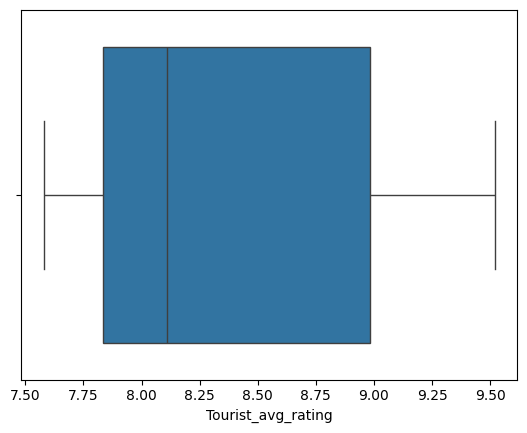

In [3]:
sb.boxplot(x = "Tourist_avg_rating", data = myData)

<Axes: xlabel='Yearly_attendance_in_millions'>

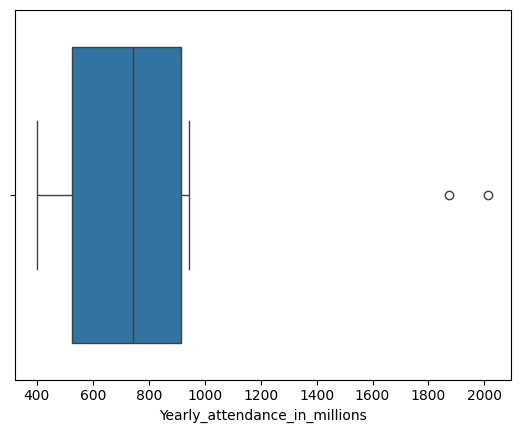

In [4]:
# Found two upper outliers here
sb.boxplot(x = "Yearly_attendance_in_millions", data = myData)

<Axes: xlabel='Yearly_income_in_billions'>

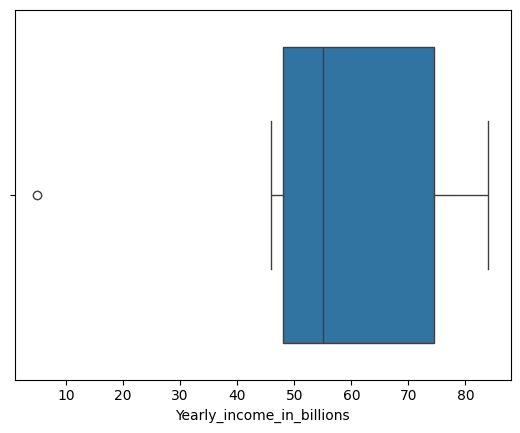

In [5]:
# Found one lower outlier here
sb.boxplot(x = "Yearly_income_in_billions", data = myData)

In [10]:
q1, q3 = myData[target].quantile(0.25), myData[target].quantile(0.75)
iqr = q3 - q1 # Inter Quartile Range (IQR)

lif = q1 - (1.5 * iqr) # lower Inner Fence (LIF)
lof = q1 - (3 * iqr) # Lower Outer Fence (LOF)
uif = q3 + (1.5 * iqr) # Upper Inner Fence (UIF)
uof = q3 + (3 * iqr) # Upper Outer Fence (UOF)

In [11]:
print(f'q1 => {q1};\n q3 => {q3}')
print(f'\nIQR => {iqr}')
print(f'\nlif => {lif};\n lof => {lof}')
print(f'\nuif => {uif};\n uof => {uof}')

q1 => Yearly_attendance_in_millions    524.500
Tourist_avg_rating                 7.835
Yearly_income_in_billions         48.000
Name: 0.25, dtype: float64;
 q3 => Yearly_attendance_in_millions    915.250
Tourist_avg_rating                 8.985
Yearly_income_in_billions         74.500
Name: 0.75, dtype: float64

IQR => Yearly_attendance_in_millions    390.75
Tourist_avg_rating                 1.15
Yearly_income_in_billions         26.50
dtype: float64

lif => Yearly_attendance_in_millions   -61.625
Tourist_avg_rating                6.110
Yearly_income_in_billions         8.250
dtype: float64;
 lof => Yearly_attendance_in_millions   -647.750
Tourist_avg_rating                 4.385
Yearly_income_in_billions        -31.500
dtype: float64

uif => Yearly_attendance_in_millions    1501.375
Tourist_avg_rating                 10.710
Yearly_income_in_billions         114.250
dtype: float64;
 uof => Yearly_attendance_in_millions    2087.500
Tourist_avg_rating                 12.435
Yearly_inco

In [14]:
# Identify lower or upper outliers using Statistics approach
myData[((myData[target] < lif) & (myData[target] >= lof)) | ((myData[target] > uif) & (myData[target] <= uof))]

,Id,Tourist_attraction,Yearly_attendance_in_millions,Tourist_avg_rating,Region,Island,Yearly_income_in_billions
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2014.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,1874.0,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [15]:
# Try to specify outlier in each attribute
print("Format in list    [Yearly_attendance_in_millions, Tourist_avg_rating, Yearly_income_in_billions]")
print("Lower Inner Fence", lif.tolist())
print("Lower Outer Fence", lof.tolist())
print("Upper Inner Fence", uif.tolist())
print("Upper Outer Fence", uof.tolist())

Format in list    [Yearly_attendance_in_millions, Tourist_avg_rating, Yearly_income_in_billions]
Lower Inner Fence [-61.625, 6.110000000000001, 8.25]
Lower Outer Fence [-647.75, 4.385000000000002, -31.5]
Upper Inner Fence [1501.375, 10.709999999999999, 114.25]
Upper Outer Fence [2087.5, 12.434999999999999, 154.0]


In [16]:
myData[((myData.Yearly_attendance_in_millions > uif.tolist()[0]) & (myData.Yearly_attendance_in_millions <= uof.tolist()[0])) |
       ((myData.Yearly_attendance_in_millions < lif.tolist()[0]) & (myData.Yearly_attendance_in_millions >= lof.tolist()[0])) ]

,Id,Tourist_attraction,Yearly_attendance_in_millions,Tourist_avg_rating,Region,Island,Yearly_income_in_billions
1,BG12,Taman Safari,2014,9.52,Bogor,Java,NaN
7,BD18,Tangkuban Perahu,1874,7.93,Bandung,Java,84.0


In [19]:
myData[(((myData.Yearly_attendance_in_millions > uif.tolist()[0]) & (myData.Yearly_attendance_in_millions <= uof.tolist()[0])) |
       ((myData.Yearly_attendance_in_millions < lif.tolist()[0]) & (myData.Yearly_attendance_in_millions >= lof.tolist()[0]))) ]

,Id,Tourist_attraction,Yearly_attendance_in_millions,Tourist_avg_rating,Region,Island,Yearly_income_in_billions
1,BG12,Taman Safari,2014,9.52,Bogor,Java,NaN
7,BD18,Tangkuban Perahu,1874,7.93,Bandung,Java,84.0


In [17]:
myData[((myData.Tourist_avg_rating > uif.tolist()[1]) & (myData.Tourist_avg_rating <= uof.tolist()[1])) |
       ((myData.Tourist_avg_rating < lif.tolist()[1]) & (myData.Tourist_avg_rating >= lof.tolist()[1])) ]

,Id,Tourist_attraction,Yearly_attendance_in_millions,Tourist_avg_rating,Region,Island,Yearly_income_in_billions


In [18]:
myData[((myData.Yearly_income_in_billions > uif.tolist()[2]) & (myData.Yearly_income_in_billions <= uof.tolist()[2])) |
       ((myData.Yearly_income_in_billions < lif.tolist()[2]) & (myData.Yearly_income_in_billions >= lof.tolist()[2])) ]

,Id,Tourist_attraction,Yearly_attendance_in_millions,Tourist_avg_rating,Region,Island,Yearly_income_in_billions
9,MN14,Bunaken,728,8.55,Manado,Sulawesi,5.0


# <center> <u>Phase 2</u> <br> DATA INTEGRATION </center>

### Assume we have another two cleansed (free of outliers or null values) tables to be integrate

In [18]:
myData_2 = pd.DataFrame({ "Id" : ["BG12", "SB11", "MD24", "PB15", "MK09", "JK35", "PD22", "NT01"],
                          "operational_hours_open" : ["07:30", "08:30", "07:30", "07:00", "09:00", "08:20", "09:00", "09:00"],
                          "operational_hours_close" : ["17:00", "18:00", "16:30", "16:30", "16:00", "18:00", "17:30", "17:00"]
                        })
myData_2

,Id,operational_hours_open,operational_hours_close
0,BG12,07:30,17:00
1,SB11,08:30,18:00
2,MD24,07:30,16:30
3,PB15,07:00,16:30
4,MK09,09:00,16:00
5,JK35,08:20,18:00
6,PD22,09:00,17:30
7,NT01,09:00,17:00


In [19]:
myData_3 = pd.DataFrame({ "Id" : ["LM05", "PD22", "BD18", "PB15", "MN14", "BT04", "BG12", "SB11"],
                          "region_area_in_m2" : [300.54, 277.43, 425.52, 220.09, 413.46, 255.92, 250.44, 364.82],
                          "world_popularity_index" : [7, 6, 8, 9, 7, 7, 6, 9]
                        })
myData_3

,Id,region_area_in_m2,world_popularity_index
0,LM05,300.54,7
1,PD22,277.43,6
2,BD18,425.52,8
3,PB15,220.09,9
4,MN14,413.46,7
5,BT04,255.92,7
6,BG12,250.44,6
7,SB11,364.82,9


### (2.1) Data Integration - Join / Merge Tables

* Using .concat()

In [20]:
# If ignore_index=True (index continued), then keys=[] can't be applied
pd.concat([myData, myData_2], ignore_index=True)

,Id,Tourist_attraction,Yearly_attendance_in_millions,Tourist_avg_rating,Region,Island,Yearly_income_in_billions,operational_hours_open,operational_hours_close
0,BT04,Ngarai Sianok,450.0,NaN,Bukittinggi,Sumatera,50.0,NaN,NaN
1,BG12,Taman Safari,2014.0,9.52,Bogor,Java,NaN,NaN,NaN
2,SB11,Grand Pakuwon,829.0,8.11,Surabaya,Java,NaN,NaN,NaN
3,MD24,Danau Toba,508.0,NaN,Medan,Sumatera,68.0,NaN,NaN
4,MK09,Fort Rotterdam,761.0,7.74,Makassar,Sulawesi,81.0,NaN,NaN
5,JK35,Taman Mini,402.0,9.42,Jakarta,Java,NaN,NaN,NaN
6,PD22,Danau Maninjau,944.0,7.58,Padang,Sumatera,55.0,NaN,NaN
7,BD18,Tangkuban Perahu,1874.0,7.93,Bandung,Java,84.0,NaN,NaN
8,KD06,Wakatobi Island,574.0,NaN,Kendari,Sulawesi,46.0,NaN,NaN
9,MN14,Bunaken,728.0,8.55,Manado,Sulawesi,5.0,NaN,NaN


In [21]:
pd.concat([myData, myData_2], keys=["from myData frame", "from myData_2 frame"])

Id Tourist_attraction  Yearly_attendance_in_millions  \
from myData frame   0  BT04      Ngarai Sianok                          450.0   
                    1  BG12       Taman Safari                         2014.0   
                    2  SB11      Grand Pakuwon                          829.0   
                    3  MD24         Danau Toba                          508.0   
                    4  MK09     Fort Rotterdam                          761.0   
                    5  JK35         Taman Mini                          402.0   
                    6  PD22     Danau Maninjau                          944.0   
                    7  BD18   Tangkuban Perahu                         1874.0   
                    8  KD06    Wakatobi Island                          574.0   
                    9  MN14            Bunaken                          728.0   
from myData_2 frame 0  BG12                NaN                            NaN   
                    1  SB11                NaN                            NaN   
                    2  MD24                NaN                            NaN   
                    3  PB15                NaN                            NaN   
                    4  MK09                NaN                            NaN   
                    5  JK35                NaN                            NaN   
                    6  PD22                NaN                            NaN   
                    7  NT01                NaN                            NaN   

                       Tourist_avg_rating       Region    Island  \
from myData frame   0                 NaN  Bukittinggi  Sumatera   
                    1                9.52        Bogor      Java   
                    2                8.11     Surabaya      Java   
                    3                 NaN        Medan  Sumatera   
                    4                7.74     Makassar  Sulawesi   
                    5                9.42      Jakarta      Java   
                    6                7.58       Padang  Sumatera   
                    7                7.93      Bandung      Java   
                    8                 NaN      Kendari  Sulawesi   
                    9                8.55       Manado  Sulawesi   
from myData_2 frame 0                 NaN          NaN       NaN   
                    1                 NaN          NaN       NaN   
                    2                 NaN          NaN       NaN   
                    3                 NaN          NaN       NaN   
                    4                 NaN          NaN       NaN   
                    5                 NaN          NaN       NaN   
                    6                 NaN          NaN       NaN   
                    7                 NaN          NaN       NaN   

                       Yearly_income_in_billions operational_hours_open  \
from myData frame   0                       50.0                    NaN   
                    1                        NaN                    NaN   
                    2                        NaN                    NaN   
                    3                       68.0                    NaN   
                    4                       81.0                    NaN   
                    5                        NaN                    NaN   
                    6                       55.0                    NaN   
                    7                       84.0                    NaN   
                    8                       46.0                    NaN   
                    9                        5.0                    NaN   
from myData_2 frame 0                        NaN                  07:30   
                    1                        NaN                  08:30   
                    2                        NaN                  07:30   
                    3                        NaN                  07:00   
                    4                        NaN                  0

* Using .merge()

In [22]:
# Alternative: myData.merge(myData_2, on="Id"), since first paramter of .merge() is 'self'
merged_1 = pd.merge(myData, myData_2, on="Id") # only display row which has matched Id
merged_1

,Id,Tourist_attraction,Yearly_attendance_in_millions,Tourist_avg_rating,Region,Island,Yearly_income_in_billions,operational_hours_open,operational_hours_close
0,BG12,Taman Safari,2014,9.52,Bogor,Java,NaN,07:30,17:00
1,SB11,Grand Pakuwon,829,8.11,Surabaya,Java,NaN,08:30,18:00
2,MD24,Danau Toba,508,NaN,Medan,Sumatera,68.0,07:30,16:30
3,MK09,Fort Rotterdam,761,7.74,Makassar,Sulawesi,81.0,09:00,16:00
4,JK35,Taman Mini,402,9.42,Jakarta,Java,NaN,08:20,18:00
5,PD22,Danau Maninjau,944,7.58,Padang,Sumatera,55.0,09:00,17:30


In [23]:
# Alternative: merged_1.merge(myData_3, on="Id"), since first paramter of .merge() is 'self'
pd.merge(merged_1, myData_3, on="Id")

,Id,Tourist_attraction,Yearly_attendance_in_millions,Tourist_avg_rating,Region,Island,Yearly_income_in_billions,operational_hours_open,operational_hours_close,region_area_in_m2,world_popularity_index
0,BG12,Taman Safari,2014,9.52,Bogor,Java,NaN,07:30,17:00,250.44,6
1,SB11,Grand Pakuwon,829,8.11,Surabaya,Java,NaN,08:30,18:00,364.82,9
2,PD22,Danau Maninjau,944,7.58,Padang,Sumatera,55.0,09:00,17:30,277.43,6


In [24]:
myData_3

,Id,region_area_in_m2,world_popularity_index
0,LM05,300.54,7
1,PD22,277.43,6
2,BD18,425.52,8
3,PB15,220.09,9
4,MN14,413.46,7
5,BT04,255.92,7
6,BG12,250.44,6
7,SB11,364.82,9


In [25]:
# You have to pass left_index AND right_index together; otherwise it'll raise error
pd.merge(merged_1, myData_3, left_index=True, right_index=True)

,Id_x,Tourist_attraction,Yearly_attendance_in_millions,Tourist_avg_rating,Region,Island,Yearly_income_in_billions,operational_hours_open,operational_hours_close,Id_y,region_area_in_m2,world_popularity_index
0,BG12,Taman Safari,2014,9.52,Bogor,Java,NaN,07:30,17:00,LM05,300.54,7
1,SB11,Grand Pakuwon,829,8.11,Surabaya,Java,NaN,08:30,18:00,PD22,277.43,6
2,MD24,Danau Toba,508,NaN,Medan,Sumatera,68.0,07:30,16:30,BD18,425.52,8
3,MK09,Fort Rotterdam,761,7.74,Makassar,Sulawesi,81.0,09:00,16:00,PB15,220.09,9
4,JK35,Taman Mini,402,9.42,Jakarta,Java,NaN,08:20,18:00,MN14,413.46,7
5,PD22,Danau Maninjau,944,7.58,Padang,Sumatera,55.0,09:00,17:30,BT04,255.92,7


<b>JOIN TABLES</b>

![JOIN TABLES](img/jointables.png)

In [26]:
# INNER JOIN
pd.merge(myData, myData_2, on="Id", how="inner")

,Id,Tourist_attraction,Yearly_attendance_in_millions,Tourist_avg_rating,Region,Island,Yearly_income_in_billions,operational_hours_open,operational_hours_close
0,BG12,Taman Safari,2014,9.52,Bogor,Java,NaN,07:30,17:00
1,SB11,Grand Pakuwon,829,8.11,Surabaya,Java,NaN,08:30,18:00
2,MD24,Danau Toba,508,NaN,Medan,Sumatera,68.0,07:30,16:30
3,MK09,Fort Rotterdam,761,7.74,Makassar,Sulawesi,81.0,09:00,16:00
4,JK35,Taman Mini,402,9.42,Jakarta,Java,NaN,08:20,18:00
5,PD22,Danau Maninjau,944,7.58,Padang,Sumatera,55.0,09:00,17:30


In [27]:
# FULL (OUTER) JOIN
pd.merge(myData, myData_2, on="Id", how="outer")

,Id,Tourist_attraction,Yearly_attendance_in_millions,Tourist_avg_rating,Region,Island,Yearly_income_in_billions,operational_hours_open,operational_hours_close
0,BT04,Ngarai Sianok,450.0,NaN,Bukittinggi,Sumatera,50.0,NaN,NaN
1,BG12,Taman Safari,2014.0,9.52,Bogor,Java,NaN,07:30,17:00
2,SB11,Grand Pakuwon,829.0,8.11,Surabaya,Java,NaN,08:30,18:00
3,MD24,Danau Toba,508.0,NaN,Medan,Sumatera,68.0,07:30,16:30
4,MK09,Fort Rotterdam,761.0,7.74,Makassar,Sulawesi,81.0,09:00,16:00
5,JK35,Taman Mini,402.0,9.42,Jakarta,Java,NaN,08:20,18:00
6,PD22,Danau Maninjau,944.0,7.58,Padang,Sumatera,55.0,09:00,17:30
7,BD18,Tangkuban Perahu,1874.0,7.93,Bandung,Java,84.0,NaN,NaN
8,KD06,Wakatobi Island,574.0,NaN,Kendari,Sulawesi,46.0,NaN,NaN
9,MN14,Bunaken,728.0,8.55,Manado,Sulawesi,5.0,NaN,NaN


In [28]:
# LEFT (OUTER) JOIN
pd.merge(myData, myData_2, on="Id", how="left")

,Id,Tourist_attraction,Yearly_attendance_in_millions,Tourist_avg_rating,Region,Island,Yearly_income_in_billions,operational_hours_open,operational_hours_close
0,BT04,Ngarai Sianok,450,NaN,Bukittinggi,Sumatera,50.0,NaN,NaN
1,BG12,Taman Safari,2014,9.52,Bogor,Java,NaN,07:30,17:00
2,SB11,Grand Pakuwon,829,8.11,Surabaya,Java,NaN,08:30,18:00
3,MD24,Danau Toba,508,NaN,Medan,Sumatera,68.0,07:30,16:30
4,MK09,Fort Rotterdam,761,7.74,Makassar,Sulawesi,81.0,09:00,16:00
5,JK35,Taman Mini,402,9.42,Jakarta,Java,NaN,08:20,18:00
6,PD22,Danau Maninjau,944,7.58,Padang,Sumatera,55.0,09:00,17:30
7,BD18,Tangkuban Perahu,1874,7.93,Bandung,Java,84.0,NaN,NaN
8,KD06,Wakatobi Island,574,NaN,Kendari,Sulawesi,46.0,NaN,NaN
9,MN14,Bunaken,728,8.55,Manado,Sulawesi,5.0,NaN,NaN


In [29]:
# RIGHT (OUTER) JOIN
pd.merge(myData, myData_2, on="Id", how="right")

,Id,Tourist_attraction,Yearly_attendance_in_millions,Tourist_avg_rating,Region,Island,Yearly_income_in_billions,operational_hours_open,operational_hours_close
0,BG12,Taman Safari,2014.0,9.52,Bogor,Java,NaN,07:30,17:00
1,SB11,Grand Pakuwon,829.0,8.11,Surabaya,Java,NaN,08:30,18:00
2,MD24,Danau Toba,508.0,NaN,Medan,Sumatera,68.0,07:30,16:30
3,PB15,NaN,NaN,NaN,NaN,NaN,NaN,07:00,16:30
4,MK09,Fort Rotterdam,761.0,7.74,Makassar,Sulawesi,81.0,09:00,16:00
5,JK35,Taman Mini,402.0,9.42,Jakarta,Java,NaN,08:20,18:00
6,PD22,Danau Maninjau,944.0,7.58,Padang,Sumatera,55.0,09:00,17:30
7,NT01,NaN,NaN,NaN,NaN,NaN,NaN,09:00,17:00


### (2.2) Data Integration - Tuple Duplication

In [30]:
# Add two duplicate tuples, where
# BD18 is same with Index-2 in all attributes
# BT04 is same with Index-5 in region_area_in_m2 but differ with world_popularity index
add_row = pd.DataFrame({ "Id": ["BD18", "BT04"],
                         "region_area_in_m2" : [425.52, 255.92],
                         "world_popularity_index" : [8, 5] })
myData_3_appended = myData_3.append(add_row, ignore_index=True) # index continued
myData_3_appended

C:\Users\nvima\AppData\Local\Temp\ipykernel_35284\3648693207.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  myData_3_appended = myData_3.append(add_row, ignore_index=True) # index continued


,Id,region_area_in_m2,world_popularity_index
0,LM05,300.54,7
1,PD22,277.43,6
2,BD18,425.52,8
3,PB15,220.09,9
4,MN14,413.46,7
5,BT04,255.92,7
6,BG12,250.44,6
7,SB11,364.82,9
8,BD18,425.52,8
9,BT04,255.92,5


In [35]:
myData_3_appended[['Id','region_area_in_m2']].duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9     True
dtype: bool

In [31]:
# BD08 in Index-8 and BT04 in Index-9 are successfully dropped
myData_3_appended.drop_duplicates("Id") # default, keep="first"

,Id,region_area_in_m2,world_popularity_index
0,LM05,300.54,7
1,PD22,277.43,6
2,BD18,425.52,8
3,PB15,220.09,9
4,MN14,413.46,7
5,BT04,255.92,7
6,BG12,250.44,6
7,SB11,364.82,9


In [32]:
# BD08 in Index-2 and BT04 in Index-5 are successfully dropped
myData_3_appended.drop_duplicates("Id", keep="last") # keep the last duplicate data

,Id,region_area_in_m2,world_popularity_index
0,LM05,300.54,7
1,PD22,277.43,6
3,PB15,220.09,9
4,MN14,413.46,7
6,BG12,250.44,6
7,SB11,364.82,9
8,BD18,425.52,8
9,BT04,255.92,5


### (2.3) Data Integration - Data Value Conflict / Discrepancy Detection

### (2.4.1) Data Integration - Redudancy Check: Chi-Square Test for Nominal/Categorical Data

In [40]:
from scipy.stats import chisquare as cs, chi2_contingency as cc

In [41]:
# Get all nominal/categorical data
myData.select_dtypes(exclude="number")

,Id,Tourist_attraction,Region,Island
0,BT04,Ngarai Sianok,Bukittinggi,Sumatera
1,BG12,Taman Safari,Bogor,Java
2,SB11,Grand Pakuwon,Surabaya,Java
3,MD24,Danau Toba,Medan,Sumatera
4,MK09,Fort Rotterdam,Makassar,Sulawesi
5,JK35,Taman Mini,Jakarta,Java
6,PD22,Danau Maninjau,Padang,Sumatera
7,BD18,Tangkuban Perahu,Bandung,Java
8,KD06,Wakatobi Island,Kendari,Sulawesi
9,MN14,Bunaken,Manado,Sulawesi


In [42]:
myData.Island.value_counts().tolist()

[4, 3, 3]

In [43]:
chisq, p_val = cs(myData.Island.value_counts().tolist(), ddof=0)
print("Chi-Square statistics value: ", round(chisq, 2))
print("p-value: ", round(p_val, 3))

Chi-Square statistics value:  0.2
p-value:  0.905


In [44]:
chisq, p_val = cs(myData['Tourist_attraction'].value_counts().tolist(), ddof=0)
print("Chi-Square statistics value: ", round(chisq, 2))
print("p-value: ", round(p_val, 3))

Chi-Square statistics value:  0.0
p-value:  1.0


### (2.4.2) Data Integration - Redudancy Check: Correlation Coefficient for Numerical Data

In [45]:
myData.select_dtypes(include="number")[:5]

,Yearly_attendance_in_millions,Tourist_avg_rating,Yearly_income_in_billions
0,450,NaN,50.0
1,2014,9.52,NaN
2,829,8.11,NaN
3,508,NaN,68.0
4,761,7.74,81.0


In [46]:
myData.cov() # Covariance

C:\Users\nvima\AppData\Local\Temp\ipykernel_35284\1956687742.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  myData.cov() # Covariance


,Yearly_attendance_in_millions,Tourist_avg_rating,Yearly_income_in_billions
Yearly_attendance_in_millions,328365.822222,53.907857,5597.238095
Tourist_avg_rating,53.907857,0.621657,-12.013333
Yearly_income_in_billions,5597.238095,-12.013333,714.952381


In [47]:
myData.corr() # Correlation (normalization of covariance)

C:\Users\nvima\AppData\Local\Temp\ipykernel_35284\3721616330.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  myData.corr() # Correlation (normalization of covariance)


,Yearly_attendance_in_millions,Tourist_avg_rating,Yearly_income_in_billions
Yearly_attendance_in_millions,1.000000,0.111167,0.428549
Tourist_avg_rating,0.111167,1.000000,-0.773415
Yearly_income_in_billions,0.428549,-0.773415,1.000000


# <center> <u>Phase 3</u> <br> DATA REDUCTION / SELECTION / COMPRESSION </center>

## (3.1) DIMENSIONALITY REDUCTION

### (3.1.1) Attribute Subset Selection
This section has three <b>metaheuristic approach</b> subbranches:
<br>1. Statistical-based Filter Methods
<br>2. Wrapper Methods
<br>3. Embeeded Methods

<font color="red">
    <b>I m p o r t a n t N o t e s</b>
    <br>1. Use high-dimension dataset (greater attributes) for best feature selection result
    <br>2. As another preprocessing phase, make sure the dataset has been NORMALIZED and CLEANED (not contain any missing/NaN value)
</font>

### (3.1.1.1) Statistical-based Filter Methods

In [3]:
import sklearn.feature_selection as fs

*Documentation [sklearn.feature_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection)*

In [16]:
# Wines dataset will used for this section (except for Bernoulli Variance)
from sklearn.datasets import load_wine
wines = load_wine()
winesDF = pd.DataFrame( data = np.c_[wines.data, wines.target], # np.c_ to concatenate
            columns = np.append(wines['feature_names'], ['Target']) )
winesDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


### (3.1.1.1.1) Variance Threshold

* Binary / Boolean Attributes (use <b>Bernoulli Variance</b>)

In [6]:
island_encoded = pd.get_dummies(myData.Island).values.tolist()
island_encoded

[[0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0]]

In [7]:
print("BERNOULLI VARIANCE THRESHOLD RESULT (first five data displayed)")
for i in range(0, 120, 20):
    print("With", i, "% threshold:\n {}\n".format(fs.VarianceThreshold((i/100)*(1-(i/100))).fit_transform(island_encoded)[:5]))

BERNOULLI VARIANCE THRESHOLD RESULT (first five data displayed)
With 0 % threshold:
 [[0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]]

With 20 % threshold:
 [[0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]]

With 40 % threshold:
 [[0]
 [1]
 [1]
 [0]
 [0]]

With 60 % threshold:
 [[0]
 [1]
 [1]
 [0]
 [0]]

With 80 % threshold:
 [[0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]]

With 100 % threshold:
 [[0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]]



* Numerical Attributes

In [8]:
print("VARIANCE THRESHOLD RESULT (first five data displayed)")
for i in range(0, 120, 20):
    print("With", i, "% threshold:\n {}\n".format(fs.VarianceThreshold(i/100).fit_transform(wines.data)[:5]))

VARIANCE THRESHOLD RESULT (first five data displayed)
With 0 % threshold:
 [[  14.23    1.71    2.43   15.6   127.      2.8     3.06    0.28    2.29
     5.64    1.04    3.92 1065.  ]
 [  13.2     1.78    2.14   11.2   100.      2.65    2.76    0.26    1.28
     4.38    1.05    3.4  1050.  ]
 [  13.16    2.36    2.67   18.6   101.      2.8     3.24    0.3     2.81
     5.68    1.03    3.17 1185.  ]
 [  14.37    1.95    2.5    16.8   113.      3.85    3.49    0.24    2.18
     7.8     0.86    3.45 1480.  ]
 [  13.24    2.59    2.87   21.    118.      2.8     2.69    0.39    1.82
     4.32    1.04    2.93  735.  ]]

With 20 % threshold:
 [[  14.23    1.71   15.6   127.      2.8     3.06    2.29    5.64    3.92
  1065.  ]
 [  13.2     1.78   11.2   100.      2.65    2.76    1.28    4.38    3.4
  1050.  ]
 [  13.16    2.36   18.6   101.      2.8     3.24    2.81    5.68    3.17
  1185.  ]
 [  14.37    1.95   16.8   113.      3.85    3.49    2.18    7.8     3.45
  1480.  ]
 [  13.24    2.59

### (3.1.1.1.2) Univariate Analysis

* Pearson's Correlation Coefficient

In [17]:
winesDF.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [18]:
fs.SelectKBest(fs.f_regression, k=3).fit_transform(wines.data, wines.target)[:5]

array([[2.8 , 3.06, 3.92],
       [2.65, 2.76, 3.4 ],
       [2.8 , 3.24, 3.17],
       [3.85, 3.49, 3.45],
       [2.8 , 2.69, 2.93]])

* Analysis of Variance (ANOVA)

In [47]:
fs.SelectKBest(fs.f_classif, k=3).fit_transform(wines.data, wines.target)[:5]

array([[   3.06,    3.92, 1065.  ],
       [   2.76,    3.4 , 1050.  ],
       [   3.24,    3.17, 1185.  ],
       [   3.49,    3.45, 1480.  ],
       [   2.69,    2.93,  735.  ]])

* Chi-Square Test

In [19]:
# Chi-Square Test can't be apply if there's negative value in dataset
fs.SelectKBest(fs.chi2, k=3).fit_transform(wines.data, wines.target)[:5]

array([[   3.06,    5.64, 1065.  ],
       [   2.76,    4.38, 1050.  ],
       [   3.24,    5.68, 1185.  ],
       [   3.49,    7.8 , 1480.  ],
       [   2.69,    4.32,  735.  ]])

* Mutual Information

In [20]:
fs.SelectKBest(fs.mutual_info_regression, k=3).fit_transform(wines.data, wines.target)[:5]

array([[   3.06,    5.64, 1065.  ],
       [   2.76,    4.38, 1050.  ],
       [   3.24,    5.68, 1185.  ],
       [   3.49,    7.8 , 1480.  ],
       [   2.69,    4.32,  735.  ]])

In [50]:
fs.SelectKBest(fs.mutual_info_classif, k=6).fit_transform(wines.data, wines.target)[:5]

array([[  14.23,    3.06,    5.64,    1.04,    3.92, 1065.  ],
       [  13.2 ,    2.76,    4.38,    1.05,    3.4 , 1050.  ],
       [  13.16,    3.24,    5.68,    1.03,    3.17, 1185.  ],
       [  14.37,    3.49,    7.8 ,    0.86,    3.45, 1480.  ],
       [  13.24,    2.69,    4.32,    1.04,    2.93,  735.  ]])

### (3.1.1.2) Wrapper Methods

* Recursive Feature Elimination (RFE)
<br>--Make sure dataset has been normalized (to prevent ConvergenceWarning)
<br>--Try different estimator (supervised learning algorithm) in sklearn.ensemble, sklearn.linear_model, or sklearn.svm

In [22]:
import sklearn.ensemble as en
import sklearn.linear_model as lm
import sklearn.svm as svm

*Documentation [sklearn.ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)*
<br>*Documentation [sklearn.linear_model](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)*
<br>*Documentation [sklearn.svm](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)*

In [23]:
fs.RFE(en.RandomForestClassifier(), n_features_to_select=3).fit_transform(mms().fit_transform(wines.data), wines.target)[:5]

array([[0.57383966, 0.37201365, 0.56134094],
       [0.51054852, 0.26450512, 0.55064194],
       [0.61181435, 0.37542662, 0.64693295],
       [0.66455696, 0.55631399, 0.85734665],
       [0.49578059, 0.25938567, 0.32596291]])

In [25]:
fs.RFE(en.ExtraTreesClassifier(), n_features_to_select=3).fit_transform(mms().fit_transform(wines.data), wines.target)[:5]

array([[0.57383966, 0.37201365, 0.56134094],
       [0.51054852, 0.26450512, 0.55064194],
       [0.61181435, 0.37542662, 0.64693295],
       [0.66455696, 0.55631399, 0.85734665],
       [0.49578059, 0.25938567, 0.32596291]])

In [26]:
fs.RFE(lm.LogisticRegression(solver='lbfgs', multi_class='ovr'), n_features_to_select=3).fit_transform(mms().fit_transform(wines.data), wines.target)[:5]

array([[0.84210526, 0.97069597, 0.56134094],
       [0.57105263, 0.78021978, 0.55064194],
       [0.56052632, 0.6959707 , 0.64693295],
       [0.87894737, 0.7985348 , 0.85734665],
       [0.58157895, 0.60805861, 0.32596291]])

In [28]:
fs.RFE(lm.SGDClassifier(), n_features_to_select=3).fit_transform(mms().fit_transform(wines.data), wines.target)[:5]

array([[0.57383966, 0.37201365, 0.56134094],
       [0.51054852, 0.26450512, 0.55064194],
       [0.61181435, 0.37542662, 0.64693295],
       [0.66455696, 0.55631399, 0.85734665],
       [0.49578059, 0.25938567, 0.32596291]])

* Sequential Selection Algorithm

In [30]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.feature_selection import ExhaustiveFeatureSelector as efs

*mlxtend library [overview](http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/) / [documentation](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.feature_selection/)*

In [31]:
sfs(
    en.RandomForestClassifier(), # Estimator
    k_features=4, # number of features to select
    forward=True # Sequential Forward Selection (SFS)
).fit_transform(mms().fit_transform(wines.data), wines.target)[:5]

array([[0.57383966, 0.37201365, 0.97069597, 0.56134094],
       [0.51054852, 0.26450512, 0.78021978, 0.55064194],
       [0.61181435, 0.37542662, 0.6959707 , 0.64693295],
       [0.66455696, 0.55631399, 0.7985348 , 0.85734665],
       [0.49578059, 0.25938567, 0.60805861, 0.32596291]])

In [32]:
sfs(
    en.RandomForestClassifier(), # Estimator
    k_features=4, # number of features to select
    forward=False # Sequential Backward Selection (SBS)
).fit_transform(mms().fit_transform(wines.data), wines.target)[:5]

array([[0.84210526, 0.61956522, 0.57383966, 0.37201365],
       [0.57105263, 0.32608696, 0.51054852, 0.26450512],
       [0.56052632, 0.33695652, 0.61181435, 0.37542662],
       [0.87894737, 0.4673913 , 0.66455696, 0.55631399],
       [0.58157895, 0.52173913, 0.49578059, 0.25938567]])

In [33]:
efs(
    en.RandomForestClassifier(), 
    min_features=1, # the lower bound of the number of features to search from
    max_features=2 # the upper bound of the number of features to search from
).fit_transform(mms().fit_transform(wines.data), wines.target)[:5]

Features: 91/91

array([[0.57383966, 0.37201365],
       [0.51054852, 0.26450512],
       [0.61181435, 0.37542662],
       [0.66455696, 0.55631399],
       [0.49578059, 0.25938567]])

* Evolutionary Selection Algorithm

### (3.1.1.3) Embedded Methods

* L1 Regularization (LASSO)

In [60]:
fs.SelectFromModel(lm.Lasso(), threshold=-np.inf, max_features=3).fit_transform(mms().fit_transform(wines.data), wines.target)[:5]

array([[0.84210526, 0.1916996 , 0.57219251],
       [0.57105263, 0.2055336 , 0.4171123 ],
       [0.56052632, 0.3201581 , 0.70053476],
       [0.87894737, 0.23913043, 0.60962567],
       [0.58157895, 0.36561265, 0.80748663]])

* Linear Support Vector Classification

In [61]:
fs.SelectFromModel(svm.LinearSVC(), threshold=-np.inf, max_features=4).fit_transform(mms().fit_transform(wines.data), wines.target)[:5]

array([[0.84210526, 0.57383966, 0.37201365, 0.56134094],
       [0.57105263, 0.51054852, 0.26450512, 0.55064194],
       [0.56052632, 0.61181435, 0.37542662, 0.64693295],
       [0.87894737, 0.66455696, 0.55631399, 0.85734665],
       [0.58157895, 0.49578059, 0.25938567, 0.32596291]])

### (3.1.2) Attribute Construction / Feature Extraction

In [62]:
# Be sure to normalize dataset first
normalized_myData_3 = mms().fit_transform(myData_3.select_dtypes(include="number"))

* Wavelet Transform

* Supervised: Linear Discriminant Analysis (LDA)

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [64]:
lda_myData_3 = LDA(n_components=2).fit(wines.data, wines.target)

print("Variance Ratio:\n {}".format(lda_myData_3.explained_variance_ratio_))
print("Variance of PC1: {:.5} %".format(lda_myData_3.explained_variance_ratio_[0]*100))
print("Variance of PC2: {:.5} %".format(lda_myData_3.explained_variance_ratio_[1]*100))

Variance Ratio:
 [0.68747889 0.31252111]
Variance of PC1: 68.748 %
Variance of PC2: 31.252 %


In [65]:
pd.DataFrame(LDA().fit_transform(wines.data, wines.target))

,0,1
0,-4.700244,1.979138
1,-4.301958,1.170413
2,-3.420720,1.429101
3,-4.205754,4.002871
4,-1.509982,0.451224
...,...,...
173,4.291508,3.390332
174,4.503296,2.083546
175,5.047470,3.196231
176,4.276155,2.431388


* Unsupervised - Linear: Principal Component Analysis (PCA)

In [66]:
from sklearn.decomposition import PCA

In [67]:
# PCA can't be applied if there are still NaN/Null and nominal/categorical values in DataFrame
# n-components must between 0 and min(total_rows, total_attributes)
pca_myData_3 = PCA(n_components=2).fit(normalized_myData_3)

print("Principal Component(s):\n {}".format(pca_myData_3.components_))
print("Principal Component 1 / PC1: {}".format(pca_myData_3.components_[0]))
print("Principal Component 2 / PC2: {}".format(pca_myData_3.components_[1]))
print("")
print("Variance Ratio:\n {}".format(pca_myData_3.explained_variance_ratio_))
print("Variance of PC1: {:.5} %".format(pca_myData_3.explained_variance_ratio_[0]*100))
print("Variance of PC2: {:.5} %".format(pca_myData_3.explained_variance_ratio_[1]*100))

Principal Component(s):
 [[ 0.63039017  0.77627845]
 [-0.77627845  0.63039017]]
Principal Component 1 / PC1: [0.63039017 0.77627845]
Principal Component 2 / PC2: [-0.77627845  0.63039017]

Variance Ratio:
 [0.59978952 0.40021048]
Variance of PC1: 59.979 %
Variance of PC2: 40.021 %


In [68]:
# WARNING: Using .fit_transform() means old dataset (normalized_my_Data_3) is multiplied by Principal Component
# n_components must be in range min(n_samples, n_features)
pd.DataFrame(PCA().fit_transform(normalized_myData_3), columns=["region_area_in_m2", "world_popularity_index"])

,region_area_in_m2,world_popularity_index
0,-0.136889,-0.029722
1,-0.466564,-0.152524
2,0.505389,-0.291866
3,0.133758,0.694543
4,0.209622,-0.456423
5,-0.273811,0.138888
6,-0.549387,-0.050534
7,0.577882,0.147637


* Unsupervised - NonLinear: Autoencoders (AE)

* t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [69]:
from sklearn.manifold import TSNE

In [70]:
tsne_myData_3 = TSNE(n_components=2).fit(normalized_myData_3)
tsne_myData_3.embedding_

array([[ -38.027615,  134.6045  ],
       [  51.358482, -140.48343 ],
       [  82.494484,   89.38676 ],
       [-148.53604 ,   68.589676],
       [ -76.85186 , -152.01147 ],
       [ -24.730417,  -13.133293],
       [ 122.25913 ,  -33.043076],
       [-165.81114 ,  -58.971764]], dtype=float32)

In [71]:
pd.DataFrame(TSNE().fit_transform(normalized_myData_3), columns=["region_area_in_m2", "world_popularity_index"])

,region_area_in_m2,world_popularity_index
0,102.602783,-96.312462
1,18.968891,-11.229933
2,137.635391,1.109281
3,-19.467077,101.716232
4,83.307281,89.238129
5,-93.296738,29.139061
6,-82.592537,-73.835098
7,4.593220,-129.664520


## (3.2) NUMEROSITY REDUCTION

### (3.2.1) Parametric Methods

* Regression

* Log-Linear

### (3.2.2) Non-Parametric Methods

* Histrogram

* Clustering

* Sampling

* Data Cube Aggregation

# <center> <u>Phase 4</u> <br> DATA TRANSFORMATION </center>

## (4.1) NUMERIC DATA TRANSFORMATION

### (4.1.1) Standarization
See its documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [77]:
pd.DataFrame(ss().fit_transform(myData_3.select_dtypes(include="number")), columns=["region_area_in_m2", "world_popularity_index"])

,region_area_in_m2,world_popularity_index
0,-0.177851,-0.337526
1,-0.494320,-1.237597
2,1.533628,0.562544
3,-1.279536,1.462614
4,1.368478,-0.337526
5,-0.788879,-0.337526
6,-0.863922,-1.237597
7,0.702401,1.462614


### (4.1.2) Normalization

* <b>Min-Max / Range-based Normalization</b><br>
new_data = (curr_data - min_data) / (max_data - min_data) * ((max_scale - min_scale) + min_scale) 

In [72]:
(myData_3.region_area_in_m2 - myData_3.region_area_in_m2.min()) / (myData_3.region_area_in_m2.max() - myData_3.region_area_in_m2.min()) * (1 - 0 + 0)

0    0.391618
1    0.279122
2    1.000000
3    0.000000
4    0.941294
5    0.174415
6    0.147739
7    0.704522
Name: region_area_in_m2, dtype: float64

In [73]:
(myData_3.world_popularity_index - myData_3.world_popularity_index.min()) / (myData_3.world_popularity_index.max() - myData_3.world_popularity_index.min()) * (1 - 0 + 0)

0    0.333333
1    0.000000
2    0.666667
3    1.000000
4    0.333333
5    0.333333
6    0.000000
7    1.000000
Name: world_popularity_index, dtype: float64

Or, simply use <b>MinMaxScaler()</b> - it's expected min. 2D array
<br>See its documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [74]:
pd.DataFrame(mms().fit_transform(myData_3.select_dtypes(include="number")), columns=["region_area_in_m2", "world_popularity_index"])

,region_area_in_m2,world_popularity_index
0,0.391618,0.333333
1,0.279122,0.000000
2,1.000000,0.666667
3,0.000000,1.000000
4,0.941294,0.333333
5,0.174415,0.333333
6,0.147739,0.000000
7,0.704522,1.000000


* <b>z-Score / Zero-mean Normalization</b><br>
new_data = (curr_data - mean_data) / stdeviation_data

In [75]:
(myData_3.region_area_in_m2 - myData_3.region_area_in_m2.mean()) / myData_3.region_area_in_m2.std()

0   -0.166365
1   -0.462394
2    1.434578
3   -1.196896
4    1.280094
5   -0.737928
6   -0.808125
7    0.657036
Name: region_area_in_m2, dtype: float64

* <b>Decimal Scaling</b><br>
new_data = curr_data / 10^n, where n is any smallest integer so max(new_data) < 1

In [76]:
myData_3.region_area_in_m2 / pow(10, 3)

0    0.30054
1    0.27743
2    0.42552
3    0.22009
4    0.41346
5    0.25592
6    0.25044
7    0.36482
Name: region_area_in_m2, dtype: float64

### (4.1.3) Discretization

## (4.2) NOMINAL / CATEGORICAL DATA TRANSFORMATION

### (4.2.1) Hierarchy Generation Concept